<a href="https://colab.research.google.com/github/Anshikasingla114/TimeSeries-Forcasting-for-StockMarket/blob/main/lstm_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT LIBRARIES THAT IS TO BE IMPORTED.

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/tcs_stock_cleaned copy.csv")

In [ ]:
df.describe()

,Prev_Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable_Volume,Percent_Deliverable,Price_Change,Percentage_Change,Year
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.0
mean,2538.207460,2542.172782,2563.580444,2514.408468,2538.039718,2537.717944,2538.432137,1.172296e+06,2.977489e+14,66873.608871,7.960575e+05,0.670336,-4.454839,-0.167742,2015.0
std,86.829359,87.605699,90.598368,82.952778,86.849305,87.057814,86.813053,6.220635e+05,1.576443e+14,28882.906787,4.309911e+05,0.090968,30.718026,1.200304,0.0
min,2319.800000,2319.400000,2343.900000,2315.250000,2321.000000,2319.800000,2322.270000,6.758200e+04,1.667550e+13,5197.000000,3.400300e+04,0.288300,-84.650000,-3.310000,2015.0
25%,2495.312500,2499.500000,2518.900000,2472.100000,2497.500000,2495.150000,2496.665000,7.821352e+05,1.950716e+14,45476.250000,4.871065e+05,0.610850,-22.137500,-0.845000,2015.0
50%,2543.050000,2548.500000,2566.000000,2520.000000,2540.150000,2541.475000,2540.445000,1.031024e+06,2.631783e+14,61449.500000,7.009530e+05,0.685600,-4.675000,-0.180000,2015.0
75%,2592.000000,2594.250000,2615.750000,2567.300000,2593.425000,2592.000000,2592.607500,1.393266e+06,3.550390e+14,82066.750000,9.946628e+05,0.726050,13.637500,0.552500,2015.0
max,2776.000000,2788.000000,2812.100000,2721.900000,2785.100000,2776.000000,2763.040000,4.834371e+06,1.206435e+15,211247.000000,2.989132e+06,0.890100,94.000000,3.500000,2015.0


In [ ]:
df.head(10)

,Date,Symbol,Series,Prev_Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable_Volume,Percent_Deliverable,Price_Change,Percentage_Change,Day,Month,Year
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,-21.45,-0.84,Thursday,January,2015
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,28.45,1.12,Friday,January,2015
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,-40.75,-1.58,Monday,January,2015
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,-82.50,-3.26,Tuesday,January,2015
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,-52.30,-2.12,Wednesday,January,2015
5,2015-01-08,TCS,EQ,2417.70,2442.4,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759,1.40,0.06,Thursday,January,2015
6,2015-01-09,TCS,EQ,2443.80,2455.0,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415,57.30,2.33,Friday,January,2015
7,2015-01-12,TCS,EQ,2512.30,2517.0,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654,-7.30,-0.29,Monday,January,2015
8,2015-01-13,TCS,EQ,2509.70,2520.0,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259,-22.10,-0.88,Tuesday,January,2015
9,2015-01-14,TCS,EQ,2497.90,2516.0,2531.80,2500.50,2525.05,2521.95,2517.54,893548,2.249546e+14,69237,498193,0.5575,5.95,0.24,Wednesday,January,2015


Drop the non numeric colums from the data


In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [ ]:
display(numeric_df.head())

,Prev_Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable_Volume,Percent_Deliverable,Price_Change,Percentage_Change,Year
0,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,-21.45,-0.84,2015
1,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,28.45,1.12,2015
2,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,-40.75,-1.58,2015
3,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,-82.50,-3.26,2015
4,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,-52.30,-2.12,2015


Prepare for the lstm model

In [ ]:
target_column = df.filter(["Close"])
data = target_column.values
train_size = int(np.ceil(len(df)*0.95))

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
train_size =  scaled_data[:train_size]
X_train, y_train = [], []

Creating Sequence of 60 days slide window

In [ ]:
sequence_length = 60

# Ensure the loop runs even if len(scaled_data) is less than 60
# This might indicate an issue with the dataset size or sequence_length
# For now, we'll assume a valid scenario where len(scaled_data) >= 60
# and fix the append issue if it arises from re-running cells.
# If the dataset is truly smaller than 60, the model training might not be meaningful.

X_train, y_train = [], [] # Re-initialize as lists before appending

for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

LSTM layers Implementation

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True, input_shape =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test.astype(np.float32)))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.2215 - mae: 0.3631 - val_loss: 6127198.0000 - val_mae: 2473.4817
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2247 - mae: 0.3635 - val_loss: 6127548.0000 - val_mae: 2473.5535
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2244 - mae: 0.3639 - val_loss: 6127242.5000 - val_mae: 2473.4871
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1785 - mae: 0.3356 - val_loss: 6127367.0000 - val_mae: 2473.5168
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1689 - mae: 0.3239 - val_loss: 6127517.5000 - val_mae: 2473.5481
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1622 - mae: 0.3157 - val_loss: 6127339.5000 - val_mae: 2473.5107
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.1638 - mae: 0.3202 - val_loss: 6127566.5000 - val_mae: 2473.5583
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1582 - mae: 0.3151 - val_loss: 6127341.0000 - val_mae: 2473.5100
Epoch 9

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


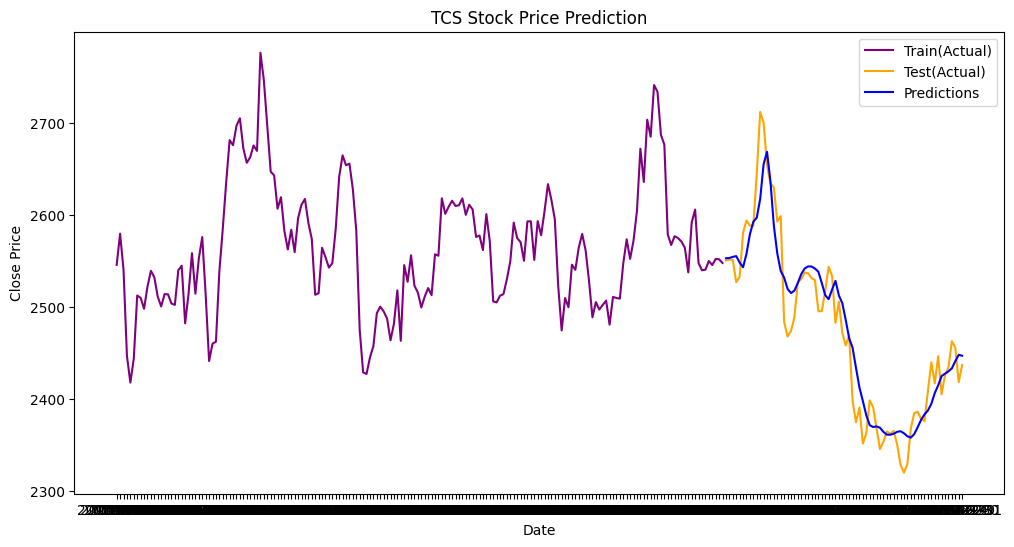

In [ ]:
# Prepare test data
test_data = scaled_data[train_size - sequence_length:]
X_test = []
y_test = df[train_size:]

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)


# Get the actual test data for plotting
train = df[:train_size]
test = df[train_size:]
test = test.copy()
test['Predictions'] = predictions


# Visualize the results
# Plot training data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:train_size], df['Close'][:train_size], label='Train(Actual)', color='purple')

# Plot test actual data
plt.plot(test['Date'], test['Close'], label='Test(Actual)', color='orange')

# Plot predictions
plt.plot(test['Date'], test['Predictions'], label='Predictions', color='blue')

plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()